In [1]:
import pandas as pd

# Replace 'your_file_path' with the actual file path
file_path = r"C:\Users\admin\Downloads\menu optimization.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print(data.head())


                 date Bill Number                        Item Desc  Quantity  \
0 2010-04-01 13:15:11     G0470115  QUA  MINERAL WATER(1000ML)             1   
1 2010-04-01 13:15:11     G0470115  MONSOON MALABAR (AULAIT)               1   
2 2010-04-01 13:17:35     G0470116  MASALA CHAI CUTTING                    1   
3 2010-04-01 13:19:55     G0470117  QUA  MINERAL WATER(1000ML)             1   
4 2010-04-01 01:20:18     G0470283  MOROCCAN MINT TEA                      1   

    Rate    Tax  Discount   Total  Category  
0   50.0  11.88       0.0   61.88  BEVERAGE  
1  100.0  23.75       0.0  123.75  BEVERAGE  
2   40.0   9.50       0.0   49.50  BEVERAGE  
3   50.0  11.88       0.0   61.88  BEVERAGE  
4   45.0  10.69       0.0   55.69  BEVERAGE  


In [2]:
# Clean the data
data.drop_duplicates(inplace=True)  # Remove duplicate rows
data.dropna(inplace=True)          # Remove rows with missing values


In [3]:
# Apply One-Hot Encoding to the 'Category' column
data_encoded = pd.get_dummies(data, columns=['Category'], prefix=['Category'])

print(data_encoded.head())


                 date Bill Number                        Item Desc  Quantity  \
0 2010-04-01 13:15:11     G0470115  QUA  MINERAL WATER(1000ML)             1   
1 2010-04-01 13:15:11     G0470115  MONSOON MALABAR (AULAIT)               1   
2 2010-04-01 13:17:35     G0470116  MASALA CHAI CUTTING                    1   
3 2010-04-01 13:19:55     G0470117  QUA  MINERAL WATER(1000ML)             1   
4 2010-04-01 01:20:18     G0470283  MOROCCAN MINT TEA                      1   

    Rate    Tax  Discount   Total  Category_BEVERAGE  Category_FOOD  \
0   50.0  11.88       0.0   61.88                  1              0   
1  100.0  23.75       0.0  123.75                  1              0   
2   40.0   9.50       0.0   49.50                  1              0   
3   50.0  11.88       0.0   61.88                  1              0   
4   45.0  10.69       0.0   55.69                  1              0   

   Category_LIQUOR  Category_LIQUOR   Category_LIQUOR & TOBACCO  \
0                0       

In [4]:
# Extract useful features from the 'date' column
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day
data['Hour'] = data['date'].dt.hour
data['Minute'] = data['date'].dt.minute
data['DayOfWeek'] = data['date'].dt.dayofweek  # Monday=0, Sunday=6


# Drop the original 'date' column as we have extracted useful features
data.drop('date', axis=1, inplace=True)

print(data.head())


  Bill Number                        Item Desc  Quantity   Rate    Tax  \
0     G0470115  QUA  MINERAL WATER(1000ML)             1   50.0  11.88   
1     G0470115  MONSOON MALABAR (AULAIT)               1  100.0  23.75   
2     G0470116  MASALA CHAI CUTTING                    1   40.0   9.50   
3     G0470117  QUA  MINERAL WATER(1000ML)             1   50.0  11.88   
4     G0470283  MOROCCAN MINT TEA                      1   45.0  10.69   

   Discount   Total  Category  Year  Month  Day  Hour  Minute  DayOfWeek  
0       0.0   61.88  BEVERAGE  2010      4    1    13      15          3  
1       0.0  123.75  BEVERAGE  2010      4    1    13      15          3  
2       0.0   49.50  BEVERAGE  2010      4    1    13      17          3  
3       0.0   61.88  BEVERAGE  2010      4    1    13      19          3  
4       0.0   55.69  BEVERAGE  2010      4    1     1      20          3  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive statistics
print(data.describe())  # Display summary statistics of numerical variables


            Quantity           Rate           Tax       Discount  \
count  145150.000000  145150.000000  145150.00000  145150.000000   
mean        1.121826     161.727783      48.93175       0.095307   
std         0.478249     102.213514      40.28672       3.728524   
min         1.000000       0.010000       0.00000       0.000000   
25%         1.000000      95.000000      22.56000       0.000000   
50%         1.000000     125.000000      32.06000       0.000000   
75%         1.000000     225.000000      72.00000       0.000000   
max        30.000000    2100.000000    2731.25000     825.000000   

               Total           Year          Month            Day  \
count  145150.000000  145150.000000  145150.000000  145150.000000   
mean      224.971683    2010.251519       6.609432      15.868632   
std       165.052799       0.433888       3.533365       8.880448   
min         0.010000    2010.000000       1.000000       1.000000   
25%       117.560000    2010.000000       

In [6]:
print('Most popular menu items and categories')
# Most popular menu items and categories
top_menu_items = data['Item Desc'].value_counts().head(10)
top_categories = data['Category'].value_counts()
print("Top 10 Menu Items:\n", top_menu_items)
print("\nCategories:\n", top_categories)


Most popular menu items and categories
Top 10 Menu Items:
 NIRVANA HOOKAH SINGLE                   8392
MINT FLAVOUR SINGLE                     5812
CAPPUCCINO                              5474
GREAT LAKES SHAKE                       4875
SAMBUCA                                 4423
POUTINE WITH FRIES                      3432
QUA  MINERAL WATER(1000ML)              3330
JR.CHL AVALANCHE                        3307
CALCUTTA MINT                           3307
B.M.T. PANINI                           2621
Name: Item Desc, dtype: int64

Categories:
 FOOD                56658
BEVERAGE            43513
TOBACCO             36294
LIQUOR               6199
MISC                 1160
WINES                 805
MERCHANDISE           473
LIQUOR & TOBACCO       47
LIQUOR                  1
Name: Category, dtype: int64


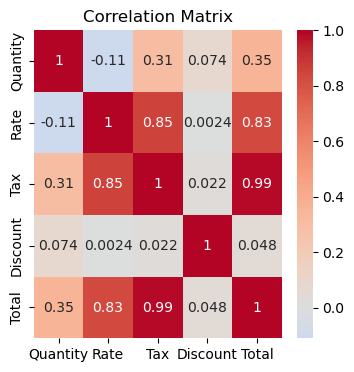

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Select numerical columns for correlation analysis
numerical_columns = ['Quantity', 'Rate', 'Tax', 'Discount', 'Total']

# Generate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


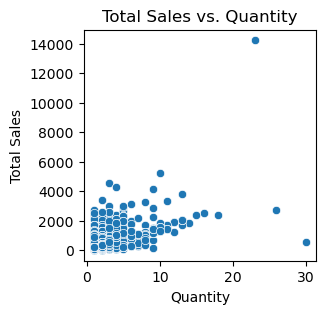

In [8]:
# Scatter Plot: Total Sales vs. Quantity
plt.figure(figsize=(3, 3))
sns.scatterplot(x='Quantity', y='Total', data=data)
plt.title('Total Sales vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_15192\4169737655.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Total'], shade=True)


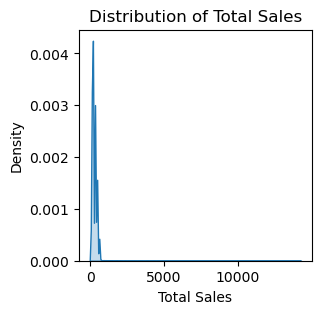

In [9]:
# Density Plot: Distribution of Total Sales
plt.figure(figsize=(3, 3))
sns.kdeplot(data['Total'], shade=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Density')
plt.show()

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.sparse import hstack

# Extract relevant features for sales prediction
X_sales = data[['Quantity', 'Rate', 'Tax', 'Discount']]
y_sales = data['Total']

# Train-test split for sales prediction
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)

# Train Random Forest for sales prediction
regressor_sales = RandomForestRegressor()
regressor_sales.fit(X_train_sales, y_train_sales)

# Make sales predictions and evaluate the model
sales_predictions = regressor_sales.predict(X_test_sales)
mse_sales = mean_squared_error(y_test_sales, sales_predictions)
print("Sales Prediction Mean Squared Error:", mse_sales)


Sales Prediction Mean Squared Error: 3752.3523998711653


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import vstack

# Extract relevant features for sales prediction
X_sales = data[['Quantity', 'Rate', 'Tax', 'Discount']]
y_sales = data['Total']

# Train-test split for sales prediction
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.2, random_state=42)

# Train Random Forest for sales prediction
regressor_sales = RandomForestRegressor()
regressor_sales.fit(X_train_sales, y_train_sales)

# Extract item descriptions
item_descriptions = data['Item Desc']

# Use TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
item_descriptions_vectorized = tfidf_vectorizer.fit_transform(item_descriptions)

# Train NearestNeighbors for approximate nearest neighbor search
num_neighbors = 11  # Number of neighbors to retrieve (including itself)
nn_model = NearestNeighbors(n_neighbors=num_neighbors, metric='cosine')
nn_model.fit(item_descriptions_vectorized)

# Function to get approximate recommendations based on item description
def get_recommendations_nn(item_desc, nn_model):
    item_vector = tfidf_vectorizer.transform([item_desc])
    similar_indices = nn_model.kneighbors(item_vector, return_distance=False)[0][1:]  # Exclude itself
    return data['Item Desc'].iloc[similar_indices]

# Specify a menu item
menu_item = "CAPPUCCINO"

# Get approximate recommendations using NearestNeighbors
recommended_items_nn = get_recommendations_nn(menu_item, nn_model)
sales_prediction = regressor_sales.predict([[1, 50, 11.88, 0]])[0]  # Example input features

# Print recommendations and sales prediction
print("Approximate Recommended Items for '{}':".format(menu_item))
print(recommended_items_nn)
print("Sales Prediction for '{}':".format(menu_item))
print(sales_prediction)


Approximate Recommended Items for 'CAPPUCCINO':
95574     CAPPUCCINO                    
23803     CAPPUCCINO                    
120164    CAPPUCCINO                    
141186    CAPPUCCINO                    
78624     CAPPUCCINO                    
4805      CAPPUCCINO                    
4802      CAPPUCCINO                    
9396      CAPPUCCINO                    
23808     CAPPUCCINO                    
120163    CAPPUCCINO                    
Name: Item Desc, dtype: object
Sales Prediction for 'CAPPUCCINO':
61.88000000000183


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
from pulp import LpProblem, LpVariable, LpMaximize, lpSum

# Load your dataset into a DataFrame called 'data'
# Assuming the dataset contains columns: 'Item Desc', 'Quantity', 'Rate'

# Extract relevant features
menu_items = data['Item Desc']
quantities = data['Quantity']
rates = data['Rate']

# Create LP problem
problem = LpProblem("Menu_Pricing_Optimization", LpMaximize)

# Define decision variables (prices for each menu item)
prices = {item: LpVariable("Price_{}".format(item), lowBound=0.01) for item in menu_items}

# Define objective function (maximize total revenue)
revenue = lpSum(prices[item] * quantities[i] * rates[i] for i, item in enumerate(menu_items))
problem += revenue

# Solve the optimization problem
problem.solve()

# Extract optimized prices
optimized_prices = {item: price.varValue for item, price in prices.items()}

# Print optimized prices
for item, price in optimized_prices.items():
    print("Optimized Price for '{}': ${:.2f}".format(item, price))


Optimized Price for 'QUA  MINERAL WATER(1000ML)    ': $0.01
Optimized Price for 'MONSOON MALABAR (AULAIT)      ': $0.01
Optimized Price for 'MASALA CHAI CUTTING           ': $0.01
Optimized Price for 'MOROCCAN MINT TEA             ': $0.01
Optimized Price for 'CAPPUCCINO                    ': $0.01
Optimized Price for 'SUMATRA MANDHELING (REG)      ': $0.01
Optimized Price for 'BRAZIL BOURBONSANTOS (AULAIT) ': $0.01
Optimized Price for 'LEMON ICED TEA                ': $0.01
Optimized Price for 'COUNTRY LEMONADE              ': $0.01
Optimized Price for 'MIAMI MELONS                  ': $0.01
Optimized Price for 'CAFFE LATTE                   ': $0.01
Optimized Price for 'RED BULL ENERGY DRINK         ': $0.01
Optimized Price for 'BRAZIL BOURBONSANTOS (REG)    ': $0.01
Optimized Price for 'DOPPIO                        ': $0.01
Optimized Price for 'PINK LEMONADE                 ': $0.01
Optimized Price for 'BLACK CURRANT ICED TEA        ': $0.01
Optimized Price for 'CURRANT COOLER     